# Bài 1

Repeat Example 11.1 for the target distribution Rayleigh($\sigma = 2$).  
Compare the performance of the Metropolis-Hastings sampler for Example 11.1 and this problem.  
In particular, what differences are obvious from the plot corresponding to Figure 11.1?  
  
Về ví dụ 11.1:  
Mục tiêu của ví dụ 11.1 là sử dụng phương pháp Metropolis-Hastings để tạo ra một mẫu từ phân phối Rayleigh. Phân phối Rayleigh được sử dụng để mô hình hóa các thời gian sống của các sự kiện với tốc độ nguy cơ tăng mạnh theo thời gian. Phân phối đề suất được sử dụng trong ví dụ 11.1 là phân phối Chi-Squared.   
  
Như vậy bây giờ cần thực hiện lại với tham số $\sigma = 2$ và so sánh tốc độ hội tụ so với việc để $\sigma = 1$  
Vẽ corresponding và so sánh với hình 11.1 để xác định sự khác biệt.

In [1]:
f <- function(x, sigma) {
    if (any(x < 0)) {
        return(0)
    }
    stopifnot(sigma > 0)
    return((x / sigma^2) * exp(-x^2 / (2 * sigma^2)))
}

m <- 10000
sigma <- 2
x <- numeric(m)
x[1] <- rchisq(1, df = 1)
k <- 0
u <- runif(m)
for (i in 2:m) {
    xt <- x[i - 1]
    y <- rchisq(1, df = xt)
    num <- f(y, sigma) * dchisq(xt, df = y)
    den <- f(xt, sigma) * dchisq(y, df = xt)
    if (u[i] <= num / den) {
        x[i] <- y
    } else {
        x[i] <- xt
        k <- k + 1
        # y is rejected
    }
}

print(k)    # số điểm bị từ chối là hơn 1 nửa (như vậy so với ví dụ 11.1 trong sách thì số điểm bị từ chối - còn gọi là bác bỏ cao hơn)

[1] 5321


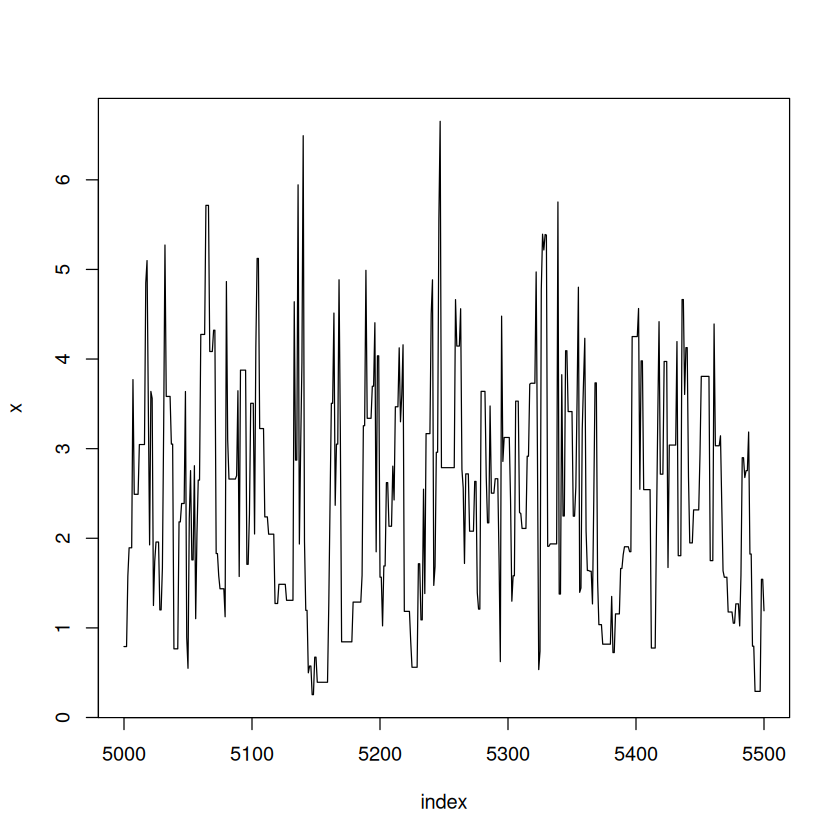

In [2]:
index <- 5000:5500
y1 <- x[index]
plot(index, y1, type = "l", main = "", ylab = "x")


Sự khác biệt là khoảng giá trị của X sinh ra khi đặt $\sigma = 2$ nhỏ hơn khoảng giá trị sinh ra khi đặt $\sigma = 4$

# Bài 2

Repeat Example 11.1 using the proposal distribution Y ∼ Gamma(Xt , 1)  
(shape parameter Xt and rate parameter 1).  
  
Về ví dụ 11.1:  
Mục tiêu của ví dụ 11.1 là sử dụng phương pháp Metropolis-Hastings để tạo ra một mẫu từ phân phối Rayleigh. Phân phối Rayleigh được sử dụng để mô hình hóa các thời gian sống của các sự kiện với tốc độ nguy cơ tăng mạnh theo thời gian. Trong ví dụ này, chúng ta sử dụng một đề xuất phân phối là phân phối chi-squared với số độ tự do được cập nhật ứng với giá trị hiện tại của chuỗi Markov.

Cụ thể, mục tiêu là tạo ra một chuỗi Markov có phân phối dừng là phân phối Rayleigh với tham số $\sigma$ được cho trước, thông qua việc sử dụng phương pháp Metropolis-Hastings để chấp nhận hoặc từ chối các mẫu đề xuất dựa trên một tỷ lệ xác suất. Sau khi chuỗi được tạo ra, nó có thể được sử dụng để ước lượng các thống kê hoặc để phân tích các tính chất của phân phối Rayleigh.

Như vậy bài tập 2 này cần làm là:  
  
Thực hiện một ví dụ cụ thể về việc sử dụng phương pháp Metropolis-Hastings để tạo ra một mẫu từ phân phối Rayleigh, nhưng lần này với một đề xuất phân phối khác. Trong bài tập này, đề xuất phân phối là phân phối gamma với tham số hình dạng là $X_t$ và tham số tỷ lệ là 1.
  
Các bước cụ thể để triển khai phương pháp Metropolis-Hastings cho mục tiêu này. Điều này bao gồm:

1. Khởi tạo chuỗi Markov với một điểm ban đầu từ phân phối đề xuất, trong trường hợp này là phân phối gamma.
2. Lặp lại quá trình Metropolis-Hastings để tạo ra một chuỗi Markov, trong đó mỗi bước lấy mẫu mới dựa trên bước trước đó và phân phối đề xuất.
3. Tính toán tỷ lệ chấp nhận cho mỗi bước lấy mẫu và quyết định liệu mẫu mới có được chấp nhận hay không.
4. Lưu trữ chuỗi Markov được tạo ra.

Cuối cùng, mục tiêu của bài tập là tạo ra một chuỗi Markov chứa các mẫu từ phân phối Rayleigh sử dụng phương pháp Metropolis-Hastings, với đề xuất phân phối là phân phối gamma.

[1] 2965


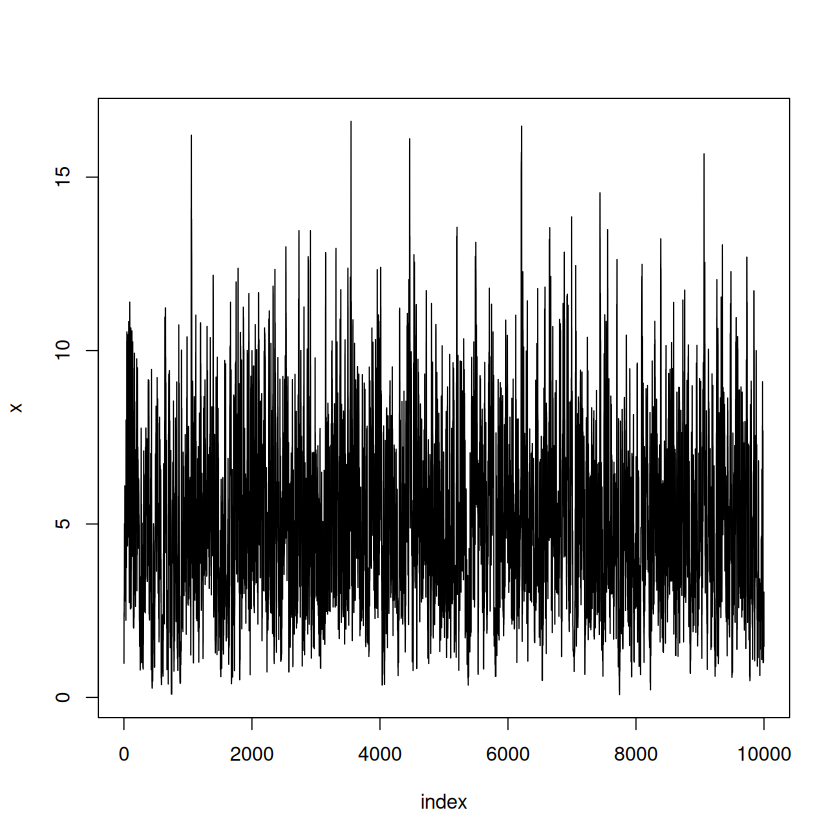

In [4]:
# Rayleigh density function
f <- function(x, sigma) {
    if (any(x < 0)) {
        return(0)
    }
    stopifnot(sigma > 0)
    return((x / sigma^2) * exp(-x^2 / (2 * sigma^2)))
}

# Metropolis-Hastings sampler
m <- 10000
sigma <- 4
x <- numeric(m)
# x[1] <- rchisq(1, df = 1)
# Khởi tạo điểm bắt đầu từ phân phối đề xuất (phân phối gamma)
x[1] <- rgamma(1, shape = 1, rate = 1)  # Lấy mẫu từ phân phối gamma với shape = 1 và rate = 1
k <- 0
u <- runif(m)
# Lặp lại qua các bước để tạo chuỗi Markov (tạo mẫu mới từ bước trước đó với phân phối gamma đề xuất)
for (i in 2:m) {
    xt <- x[i - 1]
    y <- rgamma(1, shape = xt, rate = 1)
    num <- f(y, sigma) * dgamma(xt, shape = y, rate = 1)
    den <- f(xt, sigma) * dgamma(y, shape = xt, rate = 1)
    # Tính toán tỉ lệ chấp nhận - bác bỏ để quyết định có lấy mẫu mới không 
    if (u[i] <= num / den) {
        # chấp nhận 1 mẫu 
        x[i] <- y
    } else {
        # từ chối 1 mẫu
        x[i] <- xt
        k <- k + 1
    }
}

# Count rejected samples: xác định số mẫu bị từ chối
print(k)

# Như vậy đã khởi tạo được 1 chuỗi Markov (x) với việc khi ổn định thì nó tiến gần tới phân phối Rayleigh

# Plotting
# index <- 5000:5500 # quan tâm đến một phần của chuỗi Markov, ví dụ từ bước thứ 5000 đến 5500, để vẽ biểu đồ
index <- 1:length(x)  # có thể gán như này để xem toàn bộ chuỗi markov 
y1 <- x[index]
plot(index, y1, type = "l", main = "", ylab = "x")  # index là trục x, y1 là trục y, type = "l" chỉ định rằng biểu đồ sẽ được vẽ dưới dạng đường thẳng, main = "" chỉ định rằng không có tiêu đề chính cho biểu đồ, và ylab = "x" chỉ định rằng nhãn của trục y sẽ là "x".

Số điểm bị từ chối theo phân phối này ít hơn so với sử dụng phân phối như trong ví dụ.

# Bài 9  
Triển khai Gibbs sampler để tạo chuỗi chuẩn $(X_t, Y_t)$  

Kỳ vọng bằng 0, sd = 1 và corr = 0.9.  
Vẽ mẫu được tạo.  
Fit data được tạo với 1 đường hồi quy tuyến tính $Y = \beta_0 + \beta_1 X$.  
Kiểm tra phần dư của model.

0.2019766,0.182593
0.1825930,0.202142



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66397 -0.12830  0.00226  0.12879  0.69013 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0004298  0.0026985   0.159    0.873    
x           0.9042699  0.0060818 148.684   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1908 on 4998 degrees of freedom
Multiple R-squared:  0.8156,	Adjusted R-squared:  0.8156 
F-statistic: 2.211e+04 on 1 and 4998 DF,  p-value: < 2.2e-16


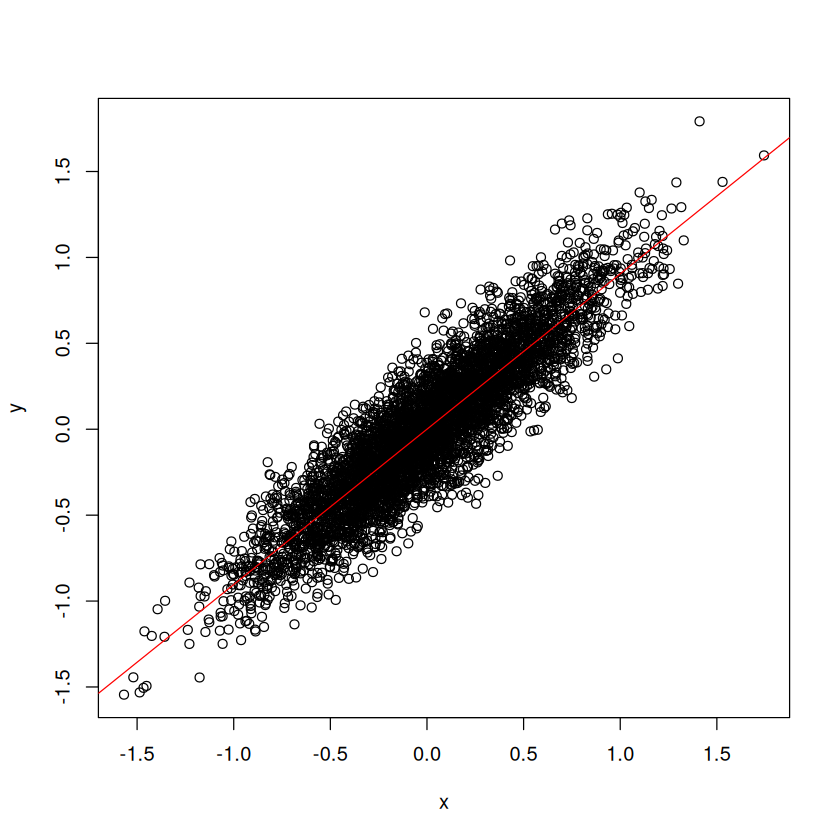

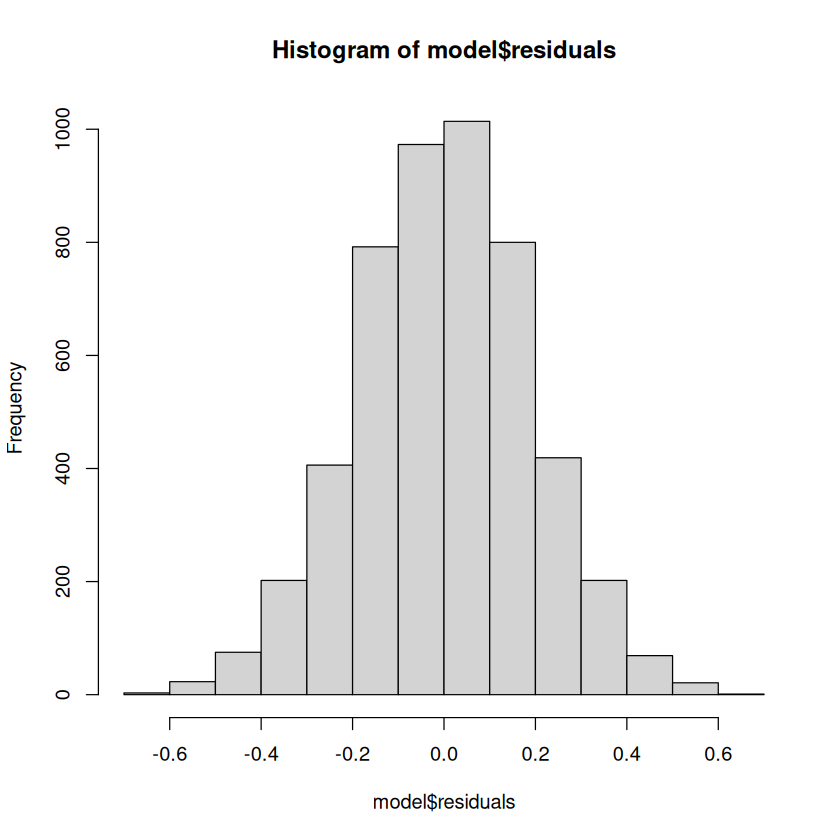

In [9]:
N <- 5000
burn <- 1000
Z <- matrix(0, N, 2)

rho <- 0.9
mu1 <- 0
mu2 <- 0
# Ta có ma trận hiệp phương sai:
# SIGMA = [[sigma11^2, rho * sigma11 * sigma22],
# [rho * sigma11 * sigma22, sigma22^2]]
# Tính được f(x, y) = 1 / (2 * PI * det(SIGMA) ** 0.5) * exp(0.5 * (x1, x2) * SIGMA * (x1, x2).T)
# Trong đó: 
# det(SIGMA) ** 0.5 = sigma22^2 * sigma11^2 - rho * rho * sigma11 * sigma 22
# det(SIGMA) ** 0.5 = 1 - ro ** 2 * 1 * 1 = 1 - rho ** 2
var1 <- 1 - rho**2
var2 <- 1 - rho**2

Z[1, ] <- c(mu1, mu2)

for (i in 2:N) {
    z2 <- Z[i - 1, 2]

    mu1 <- rho * z2
    Z[i, 1] <- rnorm(1, mu1, var1)

    z1 <- Z[i, 1]
    mu2 <- rho * z1
    Z[i, 2] <- rnorm(1, mu2, var2)
}

b <- burn + 1
z <- Z[b:N, ]
cov(z)
x <- Z[, 1]
y <- Z[, 2]
plot(x, y)

model <- lm(y ~ x)

# Plot the regression line
abline(model, col = "red")

summary(model)
hist(model$residuals)


# Bài 10  
Có hàm mật độ của bivariate:  
$f(x, y) \propto (n, x)^T * y^{x + a - 1} * (1 - y)^{n - x + b - 1}$ với $x = 0, 1, ..., n$ và $y \in [0, 1]$  
  
Có thể tìm ra $a, b, n$ dựa theo phân phối điều kiện là: $Binomial(n, y)$ và $Beta(x + a, n - x + b)$  
Sử dụng Gibbs sampler để tạo 1 chuỗi $(x, y)$ với hàm mật độ mục tiêu là: $f(x, y)$

,0,1,2,3,4,5,6,7,8,9,10
f1,0.069,0.117,0.141,0.143,0.143,0.123,0.102,0.074,0.052,0.027,0.009
fx,0.066,0.110,0.135,0.144,0.140,0.126,0.105,0.080,0.054,0.030,0.011


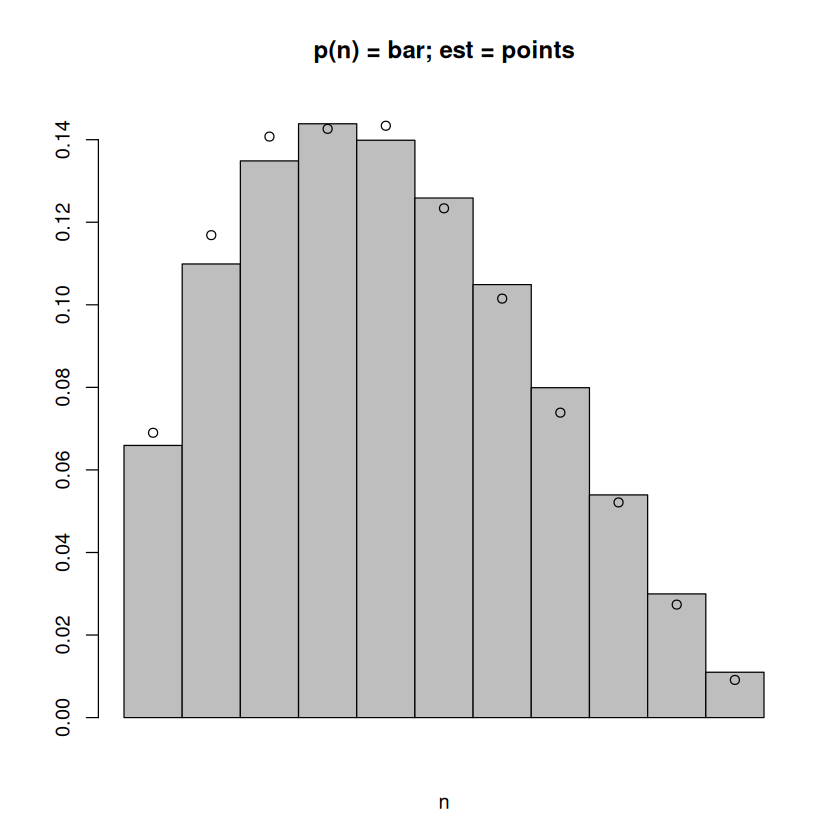

In [6]:
# Khởi tạo hằng số và tham số
N <- 10000   # Độ dài chuỗi
burn <- 2000   # Độ dài burn-in
a <- 2
b <- 3
n <- 10

x <- y <- rep(0, N)  # Khởi tạo giá trị ban đầu cho x và y

# Khởi tạo X và Y
x[1] <- rbinom(1, prob = 0.5, size = n)  # Khởi tạo x(1) từ phân phối nhị thức
y[1] <- rbeta(1, x[1] + a, n - x[1] + b)  # Khởi tạo y(1) từ phân phối beta

# Tạo chuỗi
for (i in 2:N) {
    # Lấy mẫu x(t) từ phân phối nhị thức
    x[i] <- rbinom(1, prob = y[i - 1], size = n)
    # Lấy mẫu y(t) từ phân phối beta
    y[i] <- rbeta(1, x[i] + a, n - x[i] + b)
}

# Loại bỏ burn-in # nhiễu - càng về sau thì càng chính xác với hàm mục tiêu 
xb <- x[(burn + 1):N]

# Ước lượng phân phối của f(x|y)
f1 <- table(xb) / length(xb)

# So sánh ước lượng với mục tiêu
i <- 0:n
fx <- choose(n, i) * beta(i + a, n - i + b) / beta(a, b)
round(rbind(f1, fx), 3)

# Vẽ biểu đồ
barplot(fx, space = 0, ylim = c(0, 0.15), xlab = "n", main = "p(n) = bar; est = points")
points(0:n + 0.5, f1)

Để chứng minh rằng $ f(x) $ tuân theo phân phối nhị thức và $ f(y) $ tuân theo phân phối beta từ hàm mật độ bivariate $ f(x, y) $, ta sẽ tính phân phối có điều kiện của $ x $ và $ y $ từ $ f(x, y) $.

**Phân phối có điều kiện của $ x $ khi biết $ y $:**
$
f(x|y) = \frac{f(x, y)}{f(y)}
$

**Phân phối có điều kiện của $ y $ khi biết $ x $:**
$
f(y|x) = \frac{f(x, y)}{f(x)}
$

**Tính $ f(x|y) $:**
$
f(x|y) = \frac{\binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{\int_0^1 \binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1} \, dy}
$

**Tính $ f(y|x) $:**
$
f(y|x) = \frac{\binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{\int_0^1 y^{x+a-1} \cdot (1-y)^{n-x+b-1} \, dy}
$

Bây giờ, hãy tính các tích phân trên. Đối với $ f(x|y) $, chúng ta có thể bỏ qua phần hằng số khi tính toán, vì vậy không cần phải chia cho phần dưới của tích phân. Đối với $ f(y|x) $, phần hằng số được tính bằng cách tích phân trên toàn bộ miền giá trị của $ y $.

**Tính $ f(x|y) $:**
$
f(x|y) = \frac{y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{\int_0^1 y^{x+a-1} \cdot (1-y)^{n-x+b-1} \, dy}
$
$
= \frac{y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{B(x+a, n-x+b)}
$
$
= \frac{\binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{\int_0^1 \binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1} \, dy}
$

**Tính $ f(y|x) $:**
$
f(y|x) = \frac{\binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{\int_0^1 y^{x+a-1} \cdot (1-y)^{n-x+b-1} \, dy}
$
$
= \frac{\binom{n}{x} \cdot y^{x+a-1} \cdot (1-y)^{n-x+b-1}}{B(x+a, n-x+b)}
$

Như vậy, chúng ta đã chứng minh được rằng $ f(x|y) $ là phân phối nhị thức với tham số $ n $ và $ y $, còn $ f(y|x) $ là phân phối beta với tham số $ x+a $ và $ n-x+b $. Điều này có nghĩa là $ f(x) $ là phân phối nhị thức và $ f(y) $ là phân phối beta, giống như ta muốn chứng minh.